Part 1
- Build a multi-class image classifier on the fashion MNIST dataset using
a Convolutional Neural Network (CNN) based model.
- Your library will need to be flexible enough to train an image classifier
on a different dataset and be written in a way to allow anyone to use it.
We will try to run it internally on our own dataset using instructions you
provide. Make it as easy as possible for us to use it.
- Don’t spend too long trying to push the accuracy up.
- Feel free to use open source code / guidelines.



# Data Preprocessing

This section deals in passing the data provided by the user and preprocessing it to get it ready to be supplied to the neural network.

The data we require from the user are :
1. Size of the individual images
2. Total number of images in the dataset
3. The links to the dataset of images and labels. These images have to begrayscale and of square shape and should be in the [MNIST](http://yann.lecun.com/exdb/mnist/) format. This file should be finally offered in a gzip compressed format.


This section will do the following tasks:
1. download and extract the links
2. read the extracted files and store them in a numpy array
3. reshape the numpy array to (no of images, height, width, 1) for images and normalize them to range of 0-1



In [ ]:
#importing all required libraries
import tensorflow_datasets as tfds
import gzip
import numpy as np

In [ ]:
# These are for asking the user to enter the various parameters required to train the model. 
# I have commented them out and hardcoded them for our ease of operation. 
# You can chose to uncomment this block and comment the next hard coded block 

# image_size = int(input('enter image size(of each side) of individual images'))
# num_images_train = int(input('enter no of training images'))
# num_images_test = int(input('enter no of testing images'))
# xtrain =input('add link to the xtrain data(compressed)')
# ytrain = input('add link to the ytrain data(compressed)')
# xtest = input('add link to the xtest data(compressed)')
# ytest = input('add link to the ytest data(compressed)')

In [ ]:
# Hardcoding all the parameters for ease of use. You may choose to comment this block and uncomment the above block

image_size = 28 # size of each side of the image
num_images_train = 60000 #number of images in training set
num_images_test = 10000 #number of images in validation set


# links to the compressed database of training and testing images and labels
xtrain = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz'
ytrain = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz'

xtest = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz'
ytest = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz'

In [ ]:
# function to preprocess images
def input_images(path,num_images):
  # dlmanager will download the links and return the dowloded path.
  # uncompress and open the file using gzip
  f = gzip.open(dlmanager.download(path),'r')
  buf= f.read(16)  # this is done to ignore the 1st 16 bytes that contain meta data about the dataset
  buf = f.read(image_size * image_size * num_images ) # reading all the image data
  data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32) # converting the values from unsigned int to float 32
  data = data.reshape(num_images, image_size, image_size, 1)  # reshape the array to 4 dimensions. last parameter of 1 is for grayscale images
  data = data/255 # normalize the images to range 0-1
  return data

# function to preprocess labels
def input_labels(path,num_images):
  labels=np.array([]) #creating an empty numpy array to add the labels
  f = gzip.open(dlmanager.download(path),'r') # uncompress and open the file using gzip
  f.read(8) # this is done to ignore the 1st 8 bytes that contain meta data about the dataset
  
  for i in range(num_images):   
    buf = f.read(1) # read each label
    labels=np.append(labels, np.frombuffer(buf, dtype=np.uint8).astype(np.int64)) # append the label to the array after converting to int64
  return labels


In [ ]:
dlmanager=tfds.download.DownloadManager(download_dir='data') # specify the folder to store the downloaded files

x_train = input_images(xtrain,num_images_train)  # download and preprocess training images
y_train = input_labels(ytrain,num_images_train)  # download and preprocess training labels


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

# Training


In this section we will be using the above preprocessed data to train a CNN model and save it. We are using 3 layers of CNN and MaxPooling layers followed by a final dense layer.

In [ ]:
#import the libraries
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense, Flatten


In [ ]:
model = Sequential()  # creating an object 
model.add(Conv2D(16,(2,2),activation = 'relu', input_shape = x_train[1].shape)) # no of kernels:16, window size: 2x2, activation: relu
model.add(MaxPooling2D(2,2)) # window size : 2x2

model.add(Conv2D(32,(2,2),activation='relu')) # no of kernels:16, window size: 2x2, activation: relu
model.add(MaxPooling2D(2,2)) # window size : 2x2

model.add(Conv2D(64,(2,2),activation='relu')) # no of kernels:16, window size: 2x2, activation: relu
model.add(MaxPooling2D(2,2)) # window size : 2x2

model.add(Flatten()) # flatten layer to create a 1 dimensional vector to be input to the dense layer
model.add(Dense(10,activation='softmax')) # dense layer with 10 neurons ans softmax activation for classification in 10 categories

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
model.fit(x_train,y_train ,epochs=7,validation_split=0.1)  # validation split of 10% and 7 epochs (best value selected after testing multiple values)
model.save('fmnist.model') # save the trained model to be used later

Epoch 1/7
1688/1688 [==============================] - 12s 6ms/step - loss: 0.6169 - sparse_categorical_accuracy: 0.7796 - val_loss: 0.4744 - val_sparse_categorical_accuracy: 0.8247
Epoch 2/7
1688/1688 [==============================] - 9s 6ms/step - loss: 0.4182 - sparse_categorical_accuracy: 0.8459 - val_loss: 0.3914 - val_sparse_categorical_accuracy: 0.8558
Epoch 3/7
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3743 - sparse_categorical_accuracy: 0.8633 - val_loss: 0.3722 - val_sparse_categorical_accuracy: 0.8573
Epoch 4/7
1688/1688 [==============================] - 9s 6ms/step - loss: 0.3493 - sparse_categorical_accuracy: 0.8720 - val_loss: 0.3775 - val_sparse_categorical_accuracy: 0.8590
Epoch 5/7
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3300 - sparse_categorical_accuracy: 0.8786 - val_loss: 0.3309 - val_sparse_categorical_accuracy: 0.8765
Epoch 6/7
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3140 - sparse_c

INFO:tensorflow:Assets written to: fmnist.model/assets


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 16)        80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 64)          8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

# Prediction

In this section i am using the validation dataset as a prediction data to predict the labels

We are preprocessing data in the same manner as the training data and then giving it as input to the already trained model from previous section.

In [ ]:
# function to preprocess the images and predict using the trained model
def prediction(link,num_images):
  x_test =input_images(link,num_images) # download and preprocess the data
  model = load_model('fmnist.model')    # load the saved model
  predicted_values = model.predict([x_test])  # pass the images to the model for prediction
  predicted_labels=[]
  for n in predicted_values:
    predicted_labels.append(np.argmax(n))  # going through each element and storing the index of the element with the highest value

  return predicted_labels


In [ ]:
final_labels = prediction(xtest,num_images_test)

print(final_labels)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]



[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 5, 1, 2, 6, 0, 9, 4, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 6, 9, 4, 7, 2, 1, 2, 6, 4, 6, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1, 0, 4, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 6, 5, 3, 6, 7, 1, 8, 0, 1, 2, 2, 3, 6, 7, 6, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 4, 7, 8, 0, 0, 9, 9, 3, 0, 8, 4, 1, 5, 4, 1, 9, 1, 8, 4, 2, 1, 2, 5, 1, 0, 0, 0, 1, 6, 1, 3, 2, 2, 2, 4, 1, 4, 5, 0, 4, 7, 9, 3, 7, 2, 3, 9, 0, 9, 2, 7, 4, 2, 6, 5, 2, 1, 2, 1, 3, 0, 9, 1, 0, 9, 3, 6, 7, 9, 9, 4, 4, 7, 1, 2, 1, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3, 1, 4, 7, 2, 8, 5, 2, 0, 7, 7, 6, 2, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 6, 5, 6, 9, 2, 2, 8, 6, 4, 6, 2, 9, 7, 6, 5, 5, 2, 8, 5, 2, 3, 0, 6, 8, 0, 0, 4, 4, 8, 9, 3, 1, 3, 0, 2, 3, 0, 8, 3, 7, 4, 0, 1, 6, 4, 0, 4, 6, 7, 5, 4, 5, 9, 5, 6, 5, 5, 1, 9, 8, 8, 3, 3, 6, 8, 0, 0, 2, 9, 7, 7, 1, 3, 2, 6, 2, 4, 7, 1, 4, 4, 8, 2, 6, 5, 4, 2, 7, 7, 7, 3, 3, 7, 6

Please note that i have outputed only the numerical values of the predicted values and not the item name so that we have the flexibility to change the labels based on the dataset used.

# Part 2

- Build a unified API in python to send and receive messages to / from
Apache Kafka and Google Pub/Sub.
- You will have to choose the appropriate client libraries.
- The inputs to the function and the outputs should be as unified as
possible.

**In the next block we are installing the pubsub library, but a colab bug requires that u restart the runtime and rerun all the blocks again in order to use the library in the code further. Not doing so will lead to an error**

In [ ]:
!pip install --upgrade google-cloud-pubsub

Make sure u upload the json key file from ur cloud project and change the file name in the code below

In [ ]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/content/vectorai-331806-81e44ce45bb4.json" #setting environment variable to access the gcp project

In [ ]:
from google.cloud import pubsub_v1

publisher = pubsub_v1.PublisherClient() # creating a publisher object
topic_path = 'projects/vectorai-331806/topics/my-topic-send'  #topic path where we will publish the messages. You can find this in the cloud dashboard
data = f"hello"
data = data.encode("utf-8") # Data must be a bytestring
publisher.publish(topic_path, data)# publish the message
print(f"Published messages to {topic_path}.")

Published messages to projects/vectorai-331806/topics/my-topic-send.


In [ ]:
from concurrent.futures import TimeoutError
from google.cloud import pubsub_v1

# Number of seconds the subscriber should listen for messages
timeout = 5.0

subscriber = pubsub_v1.SubscriberClient()

subscription_path = 'projects/vectorai-331806/subscriptions/my-topic-send-sub' #topic path where we will lsiten to the messages. You can find this in the cloud dashboard

def callback(message: pubsub_v1.subscriber.message.Message) -> None:
    print(f"Received {message}.") # print the recieved message
    message.ack() #acknowledge the message receipt

streaming_pull_future = subscriber.subscribe(subscription_path, callback=callback)
print(f"Listening for messages on {subscription_path}..\n")

# Wrap subscriber in a 'with' block to automatically call close() when done.
with subscriber:
    try:
        # When `timeout` is not set, result() will block indefinitely,
        # unless an exception is encountered first.
        streaming_pull_future.result(timeout=timeout)
    except TimeoutError:
        streaming_pull_future.cancel()  # Trigger the shutdown.
        streaming_pull_future.result()  # Block until the shutdown is complete.

Listening for messages on projects/vectorai-331806/subscriptions/my-topic-send-sub..

Received Message {
  data: b'hello'
  ordering_key: ''
  attributes: {}
}.


# Part 3

- Let’s do something real world now! We have multiple machine learning
services that are coordinated via a message broker.
Here, you have to design and build a robust system to classify fashion
images. (Here, we can use the fashion MNIST validation set to mock
the input) The system will have a single client consuming a single
machine learning service.
- Use the model from Part 1 and the library from Part 2 to build such an
application. It does have to be robust, scalable and able to process
requests asynchronously.
- Note that this is not a REST API based system but rather one which
can process requests in a non-blocking way and (theoretically) put the
results somewhere else (like a database). You can mock this by
printing to the console.
- Look below for a simple schematic

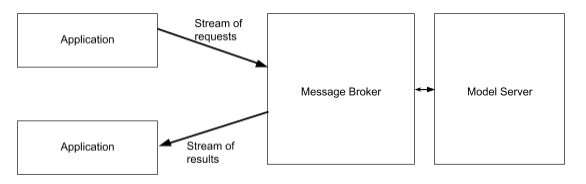

In this section we are using the api from above section to send parameters to the trained model to predict the labels. We are also using the same api to receive the final predicted labels

The Parameters we are sending are :
1. the link to the images
2. the number of images

Please ensure that the link contains a gzip file in MNIST format having grayscale images of dimension 28x28

# sending the parameters

In [ ]:
publisher = pubsub_v1.PublisherClient()  # creating a publisher object

topic_path = 'projects/vectorai-331806/topics/my-topic-send' #topic path where we will publish the messages. You can find this in the cloud dashboard

data = f"{xtest},{num_images_test}" # data contains a string with images link and number of images separated by a comma

# Data must be a bytestring
data = data.encode("utf-8")

publisher.publish(topic_path, data)

print(f"Published messages to {topic_path}.")

Published messages to projects/vectorai-331806/topics/my-topic-send.


# Receiving the parameters and predicting the data

In [ ]:
input_data = []
timeout = 5.0

subscriber = pubsub_v1.SubscriberClient()

subscription_path = 'projects/vectorai-331806/subscriptions/my-topic-send-sub'

def callback(message: pubsub_v1.subscriber.message.Message) -> None:
    global input_data
    input_data = message.data.decode().split(',')
    message.ack()

streaming_pull_future = subscriber.subscribe(subscription_path, callback=callback)
print(f"Listening for messages on {subscription_path}..\n")

# Wrap subscriber in a 'with' block to automatically call close() when done.
with subscriber:
    try:
        # When `timeout` is not set, result() will block indefinitely,
        # unless an exception is encountered first.
        streaming_pull_future.result(timeout=timeout)
    except TimeoutError:
        streaming_pull_future.cancel()  # Trigger the shutdown.
        streaming_pull_future.result()  # Block until the shutdown is complete.


final_labels = prediction(input_data[0],int(input_data[1]))

print(final_labels)

Listening for messages on projects/vectorai-331806/subscriptions/my-topic-send-sub..



Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]



[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 5, 1, 2, 6, 0, 9, 4, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 6, 9, 4, 7, 2, 1, 2, 6, 4, 6, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1, 0, 4, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 6, 5, 3, 6, 7, 1, 8, 0, 1, 2, 2, 3, 6, 7, 6, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 4, 7, 8, 0, 0, 9, 9, 3, 0, 8, 4, 1, 5, 4, 1, 9, 1, 8, 4, 2, 1, 2, 5, 1, 0, 0, 0, 1, 6, 1, 3, 2, 2, 2, 4, 1, 4, 5, 0, 4, 7, 9, 3, 7, 2, 3, 9, 0, 9, 2, 7, 4, 2, 6, 5, 2, 1, 2, 1, 3, 0, 9, 1, 0, 9, 3, 6, 7, 9, 9, 4, 4, 7, 1, 2, 1, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3, 1, 4, 7, 2, 8, 5, 2, 0, 7, 7, 6, 2, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 6, 5, 6, 9, 2, 2, 8, 6, 4, 6, 2, 9, 7, 6, 5, 5, 2, 8, 5, 2, 3, 0, 6, 8, 0, 0, 4, 4, 8, 9, 3, 1, 3, 0, 2, 3, 0, 8, 3, 7, 4, 0, 1, 6, 4, 0, 4, 6, 7, 5, 4, 5, 9, 5, 6, 5, 5, 1, 9, 8, 8, 3, 3, 6, 8, 0, 0, 2, 9, 7, 7, 1, 3, 2, 6, 2, 4, 7, 1, 4, 4, 8, 2, 6, 5, 4, 2, 7, 7, 7, 3, 3, 7, 6

# publishing the final predicted labels

In [ ]:
publisher = pubsub_v1.PublisherClient()

topic_path = 'projects/vectorai-331806/topics/my-topic-receive'

data = f'{final_labels}'

# Data must be a bytestring
data = data.encode("utf-8")

# When you publish a message, the client returns a future.
publisher.publish(topic_path, data)

print(f"Published messages to {topic_path}.")

Published messages to projects/vectorai-331806/topics/my-topic-receive.


# receiving the final predicted labels

In [ ]:
timeout = 5.0
final_labels
subscriber = pubsub_v1.SubscriberClient()

subscription_path = 'projects/vectorai-331806/subscriptions/my-topic-receive-sub'

def callback(message: pubsub_v1.subscriber.message.Message) -> None:
    global final_labels
    final_labels = message.data.decode()
    message.ack()

streaming_pull_future = subscriber.subscribe(subscription_path, callback=callback)
print(f"Listening for messages on {subscription_path}..\n")

# Wrap subscriber in a 'with' block to automatically call close() when done.
with subscriber:
    try:
        # When `timeout` is not set, result() will block indefinitely,
        # unless an exception is encountered first.
        streaming_pull_future.result(timeout=timeout)
    except TimeoutError:
        streaming_pull_future.cancel()  # Trigger the shutdown.
        streaming_pull_future.result()  # Block until the shutdown is complete.




print(final_labels)

Listening for messages on projects/vectorai-331806/subscriptions/my-topic-receive-sub..

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 5, 1, 2, 6, 0, 9, 4, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 6, 9, 4, 7, 2, 1, 2, 6, 4, 6, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1, 0, 4, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 6, 5, 3, 6, 7, 1, 8, 0, 1, 2, 2, 3, 6, 7, 6, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 4, 7, 8, 0, 0, 9, 9, 3, 0, 8, 4, 1, 5, 4, 1, 9, 1, 8, 4, 2, 1, 2, 5, 1, 0, 0, 0, 1, 6, 1, 3, 2, 2, 2, 4, 1, 4, 5, 0, 4, 7, 9, 3, 7, 2, 3, 9, 0, 9, 2, 7, 4, 2, 6, 5, 2, 1, 2, 1, 3, 0, 9, 1, 0, 9, 3, 6, 7, 9, 9, 4, 4, 7, 1, 2, 1, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3, 1, 4, 7, 2, 8, 5, 2, 0, 7, 7, 6, 2, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 6, 5, 6, 9, 2, 2, 8, 6, 4, 6, 2, 9, 7, 6, 5, 5, 2, 8, 5, 2, 3, 0, 6, 8, 0, 0, 4, 4, 8, 9, 3, 1, 3, 0, 2, 3, 0, 8, 3, 7, 4, 0, 1, 6, 4, 0, 4, 6, 7, 5, 4, 5, 9, 5, 6, 5, 5, 1, 9, 8, 8, 3, 3, 6, 8